# HW1
## TODO:  Your ID goes here: 207132556, 209792654

#### TODO: You emails for here: daphnee@post.bgu.ac.il, yuvala4@post.bgu.ac.il

## Introduction
This is the first Deep Learning assignment of the course.
It is divided into three sections:
1. Toy classification tasks (50 pts.)
2. Toy regressions tasks (30 pts.)
3. MNIST (binary) classification task (20 pts.)

See the instructions before each section.
You are not required to normalize the data in sections 1 and 2.

## Submission
The deadline for the task is 12.12.2024 end of day.
You may work in teams of 2 or 3.

Submission is via Moodle. Submit the **already run** notebook (i.e., with its output, figures, etc.,).

#Section 1: Classification Tasks
## TODO
For the entire section, do the following (i.e., only once):
1. Write a training function that returns the trained model and training loss
2. Write a plotting function to plot the training loss
3. Write a plotting function that scatter plots the predicted labels and decision boundaries.
4. Write a preprocessing function to handle the data (convert to pytorch tensor, etc).
5. Write an evaluation function that prints the set accuracy (train/test)

For each of the 5 exercises, do the following:
1. Create either a linear classifier if the problem seems linearly separable or an MLP using PyTorch. Explain your choice.
2. Train the model and plot the loss across epochs.
3. Plot the predicted labels and decision boundaries for the train set. Show the accuracy in the title (up to 3 decimals points).
4. Plot the predicted labels and decision boundaries for the test set.  Show the accuracy in the title (up to 3 decimals points).
5. Do NOT change the random seed of the data generation functions.
6. Create a Markdown cell and explain briefly (2-3 lines): why did the model perform well/poorly? What affected your design choices? What did you learn from previous attempts?


EX5 has further instructions.

## Grading:
**Accuracy** computed on the test set:
1. 80-100%: 10 pts (full grade)
2. 70-80%: 8pts
3. 60-70%: 6pts
4. < 60%: 5pts

You will also be graded on the correctness of your code and the discussion that follows each excersice.



## Setup
## DO NOT MODIFY THESE FUNCTIONS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D



In [2]:
### EX1
def random_points_in_triangle(v1, v2, v3, n_points):
    points = []
    for _ in range(n_points):
        r1, r2 = np.random.rand(2)
        sqrt_r1 = np.sqrt(r1)
        point = (1 - sqrt_r1) * v1 + sqrt_r1 * (1 - r2) * v2 + sqrt_r1 * r2 * v3
        points.append(point)
    return np.array(points)

def generate_symmetric_triangles_data(K=3, N=100, random_state=42):
    np.random.seed(random_state)
    # Define vertices for three symmetric triangles
    side_length = 2
    height = np.sqrt(3) * side_length / 2
    triangles = [
        (np.array([0, 0]), np.array([side_length, 0]), np.array([side_length / 2, height])),
        (np.array([0, 0]), np.array([-side_length, 0]), np.array([-side_length / 2, height])),
        (np.array([0, 0]), np.array([1.5, -height]), np.array([-1.5, -height]))
    ]

    X, y = [], []
    for i, (v1, v2, v3) in enumerate(triangles):
        points = random_points_in_triangle(v1, v2, v3, N)
        X.append(points)
        y += [i] * N

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX2
def generate_grid_data(grid_size=4, min_points=5, max_points=20, random_state=42):
    np.random.seed(random_state)
    X, y = [], []
    half_grid_size = grid_size // 2

    for i in range(grid_size):
        for j in range(grid_size):
            n_points = np.random.randint(min_points, max_points + 1)
            x_offset = i - half_grid_size + 0.5
            y_offset = j - half_grid_size + 0.5
            # Generate points more centered within the square
            points = 0.8 * (np.random.rand(n_points, 2) - 0.5) + [x_offset, y_offset]
            X.append(points)
            label = (i + j) % 2
            y += [label] * n_points

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX3
def generate_concentric_circles_data(radii=[1, 2, 3, 4], points_per_circle=100, random_state=42):
    np.random.seed(random_state)
    X, y = [], []

    for i, radius in enumerate(radii):
        angles = np.linspace(0, 2 * np.pi, points_per_circle, endpoint=False)
        circle_x = radius * np.cos(angles) + np.random.normal(0, 0.1, points_per_circle)
        circle_y = radius * np.sin(angles) + np.random.normal(0, 0.1, points_per_circle)
        X.append(np.vstack((circle_x, circle_y)).T)
        y += [i] * points_per_circle

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX4
def generate_nested_rectangles_data(inner_rect=(2, 1), middle_rect=(4, 2), outer_rect=(6, 3), points_per_rectangle=100, random_state=42):
    np.random.seed(random_state)
    X, y = [], []

    # Inner rectangle
    width, height = inner_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    X.append(np.vstack((x_points, y_points)).T)
    y += [0] * points_per_rectangle

    # Middle rectangle
    width, height = middle_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    # Exclude points that fall inside the inner rectangle
    mask = (np.abs(x_points) > inner_rect[0] / 2) | (np.abs(y_points) > inner_rect[1] / 2)
    X.append(np.vstack((x_points[mask], y_points[mask])).T)
    y += [1] * len(x_points[mask])

    # Outer rectangle
    width, height = outer_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    # Exclude points that fall inside the middle rectangle
    mask = (np.abs(x_points) > middle_rect[0] / 2) | (np.abs(y_points) > middle_rect[1] / 2)
    X.append(np.vstack((x_points[mask], y_points[mask])).T)
    y += [2] * len(x_points[mask])

    X = np.vstack(X)
    y = np.array(y)
    return X, y


def plot_data(X, y, title=""):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=set(y), title="Classes")
    plt.show()



# TODO - your general functions for Section 1

In [8]:
### Your code goes here (you may break this part to more than one cell) ####
### Imports
import torch
import torchvision
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
from tqdm import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Preprocessing function ####
def preprocess_data(X, y):
    X_proc, y_proc = torch.Tensor(X).to(device), torch.Tensor(y).to(device).long()
    return X_proc, y_proc

### Training function ###
def train_model(model, X, y, optimizer, criterion, num_epochs=1000):
  training_loss = []

  for epoch in tqdm(range(num_epochs)):
    optimizer.zero_grad()

    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    training_loss.append(loss.item())

  return model, training_loss

### Plot training loss function ###
def plot_training_loss(training_loss):
    plt.figure(figsize=(8, 5))
    plt.plot(training_loss, label="Training Loss")
    plt.title("Training Loss Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

### Plot predicted labels and decision boundaries ###
def plot_decision_boundary(model, X, y, accuracy, axis_lim, dtype="", resolution=100):
   # Create 1D arrays for x and y axis
    lim_axis = 6
    xs = torch.linspace(-lim_axis, lim_axis, steps=500)
    ys = torch.linspace(-lim_axis, lim_axis, steps=500)

    # Create a 2D grid (meshgrid)
    xx_m, yy_m = torch.meshgrid(xs, ys, indexing='xy')

    # Flatten the grid and combine into (x, y) coordinates
    xx, yy = xx_m.ravel(), yy_m.ravel()
    xy_coord = torch.stack([xx, yy], dim=1)
    # For ploting
    xx_m, yy_m = xx_m.numpy(), yy_m.numpy()
    xy_coord.shape

    # Pass the grid points through the model to get predictions
    decision_bound = model(xy_coord.to(device)).detach().cpu().numpy()
    decision_bound = np.argmax(decision_bound, axis=1)

    X_np = X.cpu().numpy()
    y_np = y.cpu().numpy()

    # Plot decision boundary
    plt.scatter(xx_m, yy_m, c=decision_bound, cmap='viridis', alpha=0.2, edgecolor=None)

    # Overlay data points
    plt.scatter(X_np[:, 0], X_np[:, 1], c=y_np , cmap='viridis', s=50, edgecolors='k')

    # Set axis limits
    plt.xlim(axis_lim)
    plt.ylim(axis_lim)

    plt.title("Decision Boundaries" + " - " + dtype + "\n" + "Accuracy: " + str(accuracy))
    plt.show()



### Evaluation function ###
def evaluate_model(model, X, y):
      model.eval()

      with torch.no_grad():
          y_pred = model(X)
          predictions = torch.argmax(y_pred, dim=1)
          accuracy = (predictions == y).float().mean().item()

      return round(accuracy, 3)




## EX1

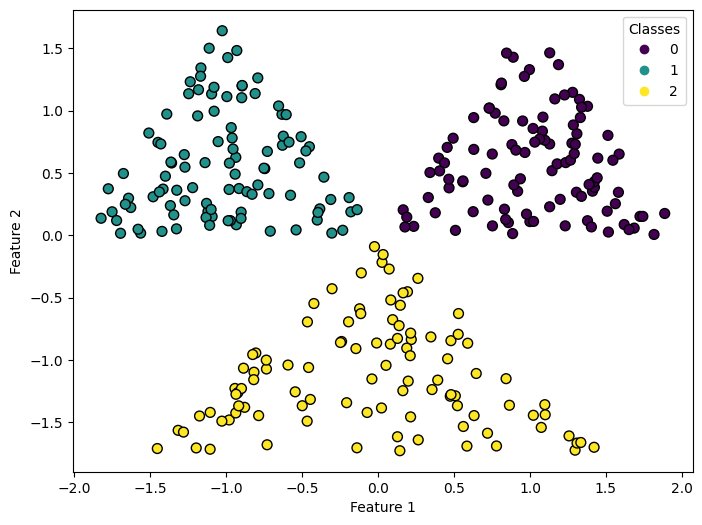

In [9]:
# Generate the data
X_train, y_train = generate_symmetric_triangles_data(random_state=0)
X_test, y_test = generate_symmetric_triangles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

100%|██████████| 1000/1000 [00:00<00:00, 1312.39it/s]


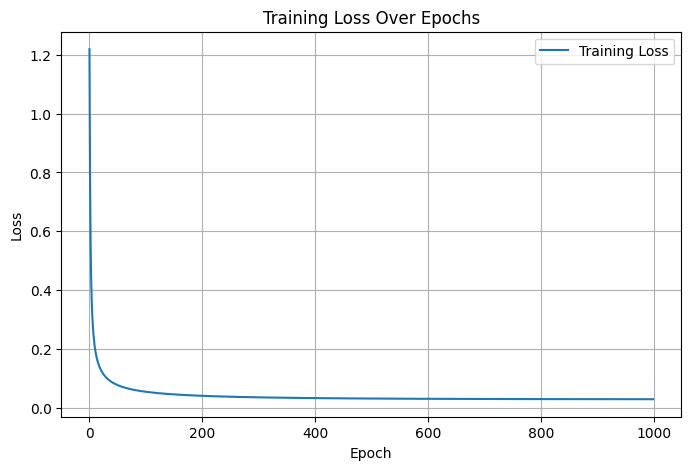

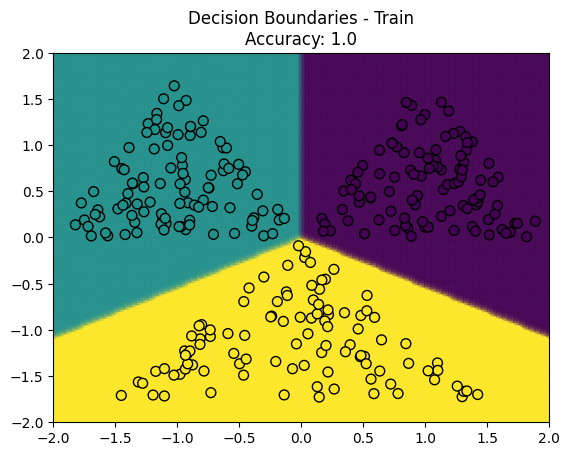

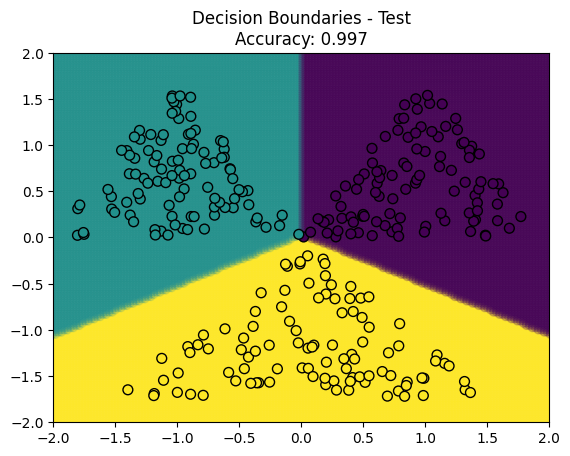

In [10]:
### Your code goes here ####

criterion = nn.NLLLoss()
input_size = 2
output_size = 3

X_train, y_train = preprocess_data(X_train, y_train)
X_test, y_test = preprocess_data(X_test, y_test)

softmax_model = nn.Sequential(nn.Linear(input_size, output_size), nn.LogSoftmax(dim=1))

softmax_model = softmax_model.to(device)

softmax_optimizer = optim.SGD(softmax_model.parameters(), lr=1, weight_decay=0.001)

softmax_model, training_loss = train_model(softmax_model, X_train, y_train, softmax_optimizer, criterion)
plot_training_loss(training_loss)

accuracy_train = evaluate_model(softmax_model, X_train, y_train)
accuracy_test = evaluate_model(softmax_model, X_test, y_test)

axis_lim = [-2, 2]
plot_decision_boundary(softmax_model, X_train, y_train, accuracy_train, axis_lim, "Train")
plot_decision_boundary(softmax_model, X_test, y_test, accuracy_test, axis_lim, "Test")



1. **Why did we picked a linear classifier:**

  As can be seen in the plot, the data points creates triangles, which can be seperated by linear lines.

2. **Why did the model perform well:**

  The data is structured in such a way that it was linearly seperable, as mentioned above.

3. **What affected your design choices:**

  We wanted to keep the model simple and computationaly efficient; thus, we chose a linear model.

3. **What did you learn from previous attempts:**

  The first attempt acheived sufficient results.


## EX2

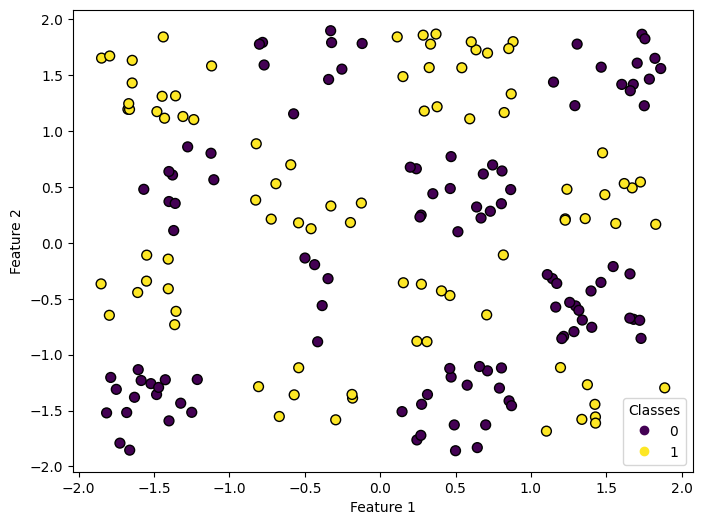

In [11]:
# Generate the data
X_train, y_train = generate_grid_data(random_state=0)
X_test, y_test = generate_grid_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

100%|██████████| 1000/1000 [00:01<00:00, 871.81it/s]


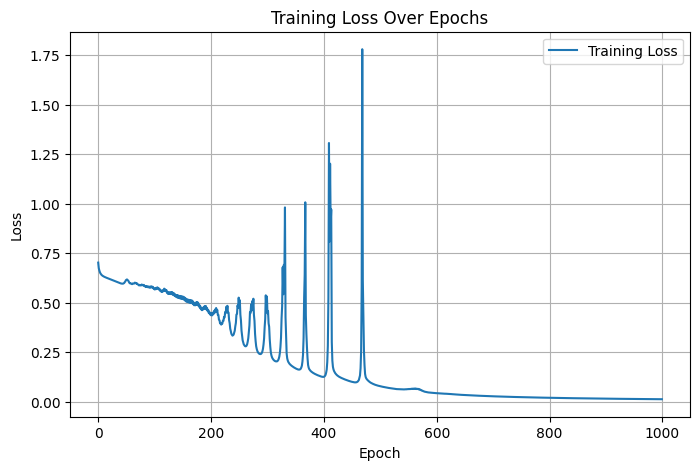

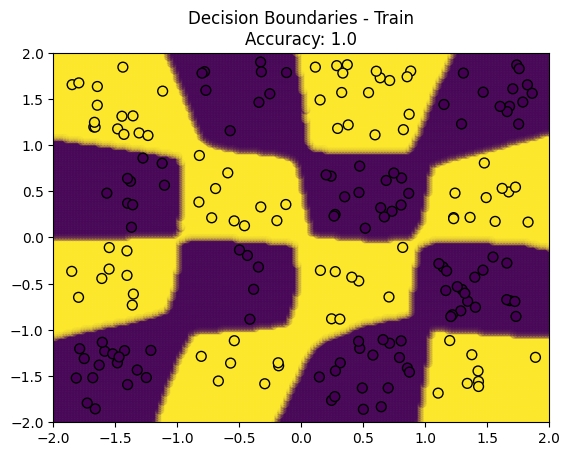

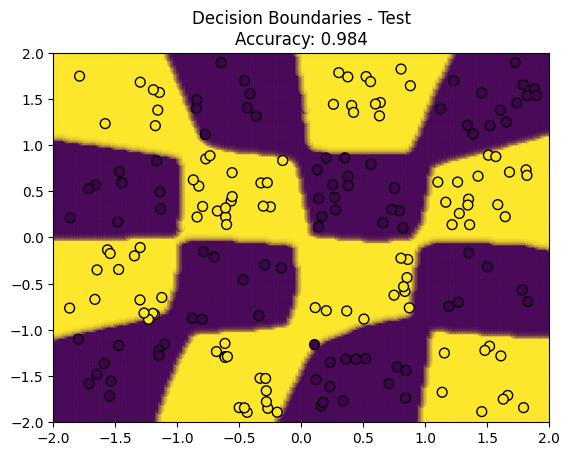

In [14]:
### Your code goes here ####

criterion = nn.NLLLoss()
input_size = 2
output_size = 2
hidden_size = [256, 128]
lr = 0.25

X_train, y_train = preprocess_data(X_train, y_train)
X_test, y_test = preprocess_data(X_test, y_test)

mlp_model = nn.Sequential(nn.Linear(input_size, hidden_size[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_size[0], hidden_size[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_size[1], output_size),
                      nn.LogSoftmax(dim=1))
mlp_model = mlp_model.to(device)

mlp_optimizer = optim.SGD(mlp_model.parameters(), lr, weight_decay=0.0001)

mlp_model, training_loss = train_model(mlp_model, X_train, y_train, mlp_optimizer, criterion)
plot_training_loss(training_loss)

accuracy_train = evaluate_model(mlp_model, X_train, y_train)
accuracy_test = evaluate_model(mlp_model, X_test, y_test)

axis_lim = [-2, 2]
plot_decision_boundary(mlp_model, X_train, y_train, accuracy_train, axis_lim, "Train")
plot_decision_boundary(mlp_model, X_test, y_test, accuracy_test, axis_lim, "Test")



1. **Why did we picked mlp:**

  We chose to use an mlp model since the data did not seem to be linearly seperable.

2. **Why did the model perform well/poorly:**

  The model performs relatively well since the mlp model was indeed an adequate choice.

3. **What affected your design choices:**

  Same as 1 and 4.

4. **What did you learn from previous attempts:**

  We lowered the learning rate so that the model would converge better. We also found that the performances between 2 and 3 hidden layers was miniscule (and 2 performed better).


## EX3

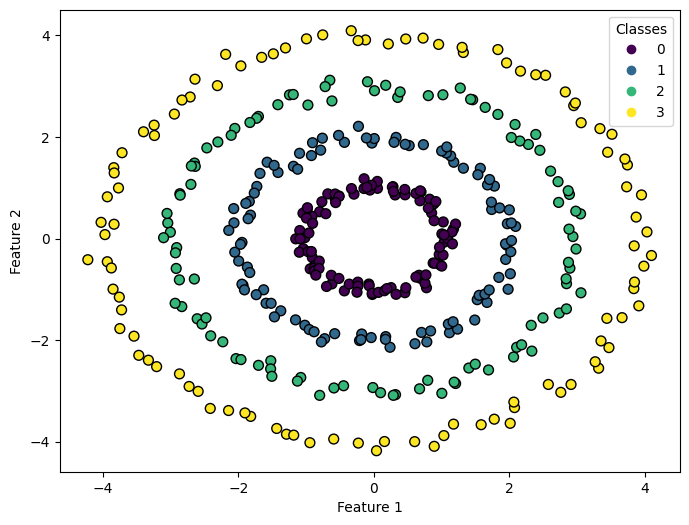

In [15]:
# Generate the data
X_train, y_train = generate_concentric_circles_data(random_state=0)
X_test, y_test = generate_concentric_circles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)


100%|██████████| 1000/1000 [00:01<00:00, 867.59it/s]


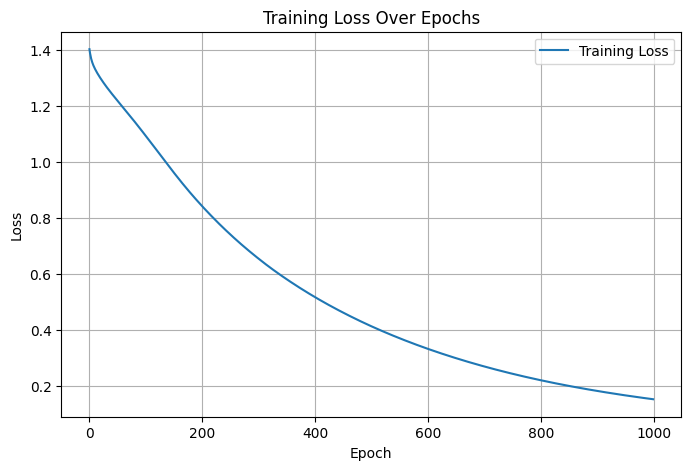

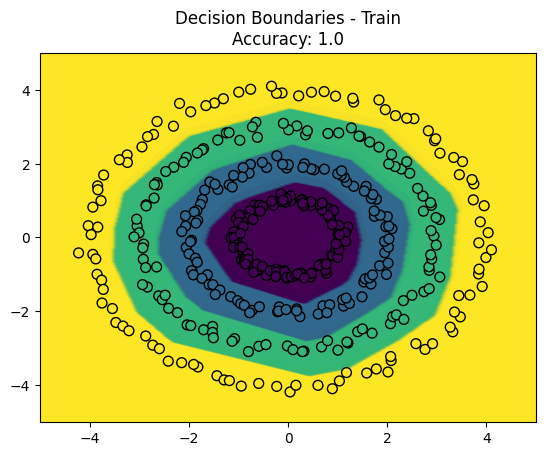

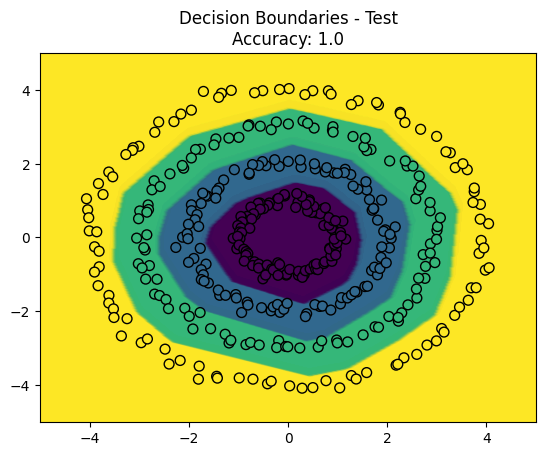

In [16]:
### Your code goes here ####

criterion = nn.NLLLoss()
input_size = 2
output_size = 4
hidden_size = 16
lr = 0.1

X_train, y_train = preprocess_data(X_train, y_train)
X_test, y_test = preprocess_data(X_test, y_test)

mlp_model = nn.Sequential(nn.Linear(input_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, output_size),
                      nn.LogSoftmax(dim=1))
mlp_model = mlp_model.to(device)

mlp_optimizer = optim.SGD(mlp_model.parameters(), lr, weight_decay=0.0001)

mlp_model, training_loss = train_model(mlp_model, X_train, y_train, mlp_optimizer, criterion)
plot_training_loss(training_loss)

accuracy_train = evaluate_model(mlp_model, X_train, y_train)
accuracy_test = evaluate_model(mlp_model, X_test, y_test)

axis_lim = [-5, 5]
plot_decision_boundary(mlp_model, X_train, y_train, accuracy_train, axis_lim, "Train")
plot_decision_boundary(mlp_model, X_test, y_test, accuracy_test, axis_lim, "Test")



1. **Why did we picked a MLP classifier:**

  We chose to use an mlp model since the data did not seem to be linearly seperable (it's a circle).
2. **Why did the model perform well:**

  The model worked well because it consists of points with a good separation between each class.
3. **What affected your design choices:**

  We wanted to use only the needed amount of resorces to keep the model computationaly efficient.

3. **What did you learn from previous attempts:**

  We found out that with limited resources such as 1 hidden layer and a low hidden size, we can reach an accuracy of 100%


## EX4

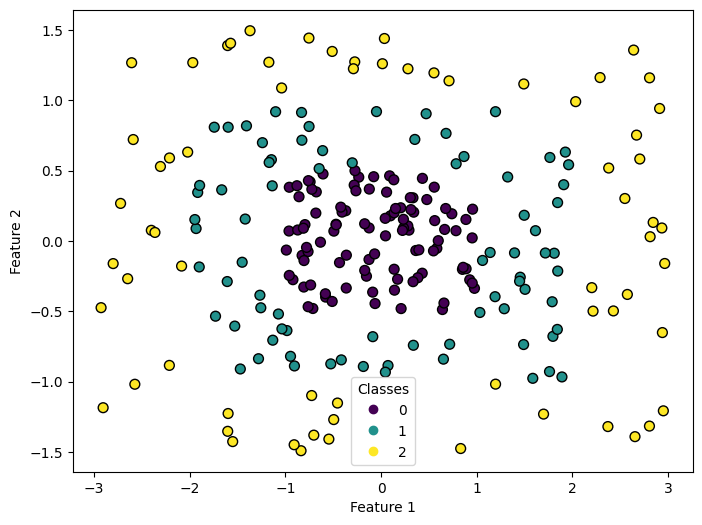

In [18]:


# Generate the data
X_train, y_train = generate_nested_rectangles_data(random_state=0)
X_test, y_test = generate_nested_rectangles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

100%|██████████| 1000/1000 [00:01<00:00, 810.81it/s]


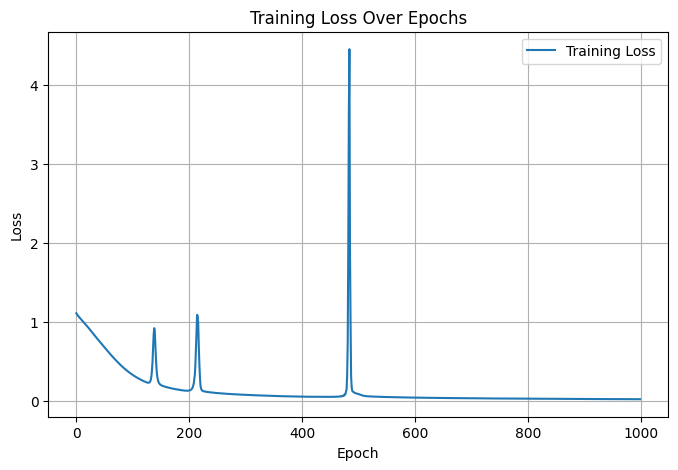

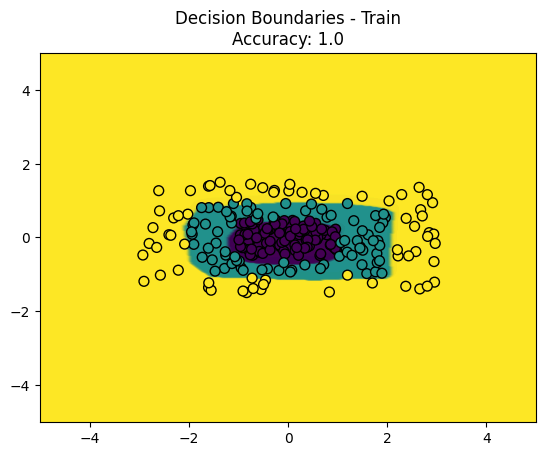

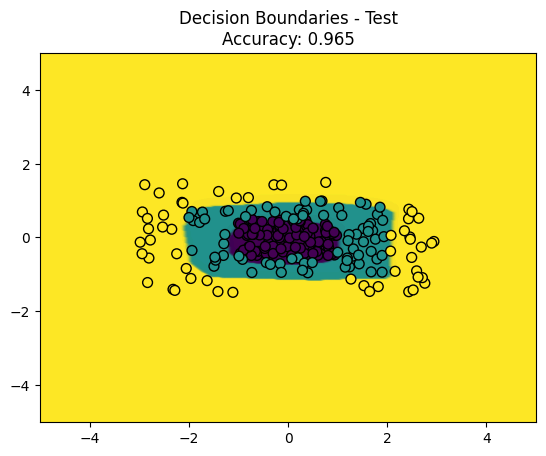

In [19]:
### Your code goes here ####

criterion = nn.NLLLoss()
input_size = 2
output_size = 3
hidden_size = [32, 16]
lr = 0.25

X_train, y_train = preprocess_data(X_train, y_train)
X_test, y_test = preprocess_data(X_test, y_test)

mlp_model = nn.Sequential(nn.Linear(input_size, hidden_size[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_size[0], hidden_size[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_size[1], output_size),
                      nn.LogSoftmax(dim=1))
mlp_model = mlp_model.to(device)

mlp_optimizer = optim.SGD(mlp_model.parameters(), lr, weight_decay=0.0001)

mlp_model, training_loss = train_model(mlp_model, X_train, y_train, mlp_optimizer, criterion)
plot_training_loss(training_loss)

accuracy_train = evaluate_model(mlp_model, X_train, y_train)
accuracy_test = evaluate_model(mlp_model, X_test, y_test)

axis_lim = [-5, 5]
plot_decision_boundary(mlp_model, X_train, y_train, accuracy_train, axis_lim, "Train")
plot_decision_boundary(mlp_model, X_test, y_test, accuracy_test, axis_lim, "Test")



1. **Why did we picked mlp:**

  We chose to use an mlp model since the data did not seem to be linearly seperable.


2. **Why did the model perform well:**

  The model performed well because the data's structure allowed the ReLU-activated MLP to effectively learn the decision boundaries between the three classes with sufficient training data and an appropriate architecture.


3. **What affected your design choices:**

  The choice of hidden layers (32 and 16 neurons) and ReLU activations ensured sufficient model capacity for the task without overfitting, while SGD with a learning rate of 0.25 provided efficient optimization.

4. **What did you learn from previous attempts:**

  That 3 layers didn't work very well in this case, and 32, 16 neurons gave suffient results.


## EX5 - Mystery Dataset
Load the data from the ex5.zip file:
X_train.npy
y_train.npy
X_test.npy
y_test.npy

Figure out the input and output dims and perform the classification task as in previous exercises.

You do not have to plot the data, but you may if you see fit.

X_train shape: (600, 5)
y_train shape: (600,)
X_test shape: (600, 5)
y_test shape: (600,)
Output size: 6


100%|██████████| 1000/1000 [00:02<00:00, 456.52it/s]


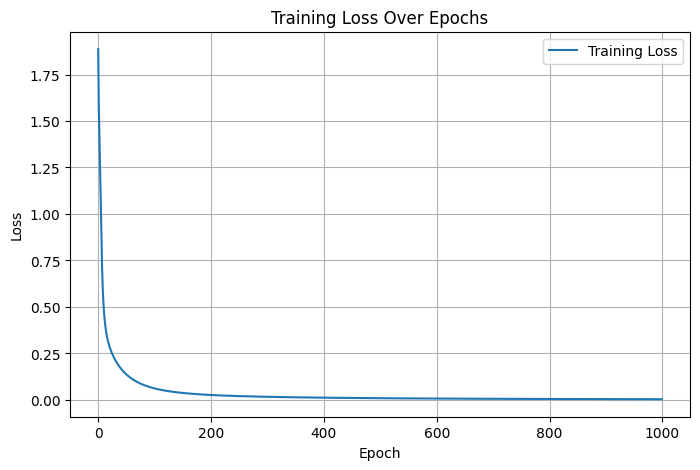

Accuracy on training set: 1.0
Accuracy on test set: 0.978


In [23]:
### Your code goes here ####

## load numpy array using np.load()

X_test = np.load('X_test.npy')
X_train = np.load('X_train.npy')
y_test = np.load('y_test.npy')
y_train = np.load('y_train.npy')

## Figure out the data dimensions
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Determine the unique classes
unique_classes = np.unique(y_train)
output_size = len(unique_classes)
print("Output size:", output_size)


## Init and train model. Report Accuracy
input_size = 5
criterion = nn.NLLLoss()
hidden_size = [32, 16]
lr = 0.25


X_train, y_train = preprocess_data(X_train, y_train)
X_test, y_test = preprocess_data(X_test, y_test)

mlp_model = nn.Sequential(nn.Linear(input_size, hidden_size[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_size[0], hidden_size[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_size[1], output_size),
                      nn.LogSoftmax(dim=1))
mlp_model = mlp_model.to(device)

mlp_optimizer = optim.SGD(mlp_model.parameters(), lr, weight_decay=0.0001)

mlp_model, training_loss = train_model(mlp_model, X_train, y_train, mlp_optimizer, criterion)
plot_training_loss(training_loss)

accuracy_train = evaluate_model(mlp_model, X_train, y_train)
accuracy_test = evaluate_model(mlp_model, X_test, y_test)

print("Accuracy on training set:", accuracy_train)
print("Accuracy on test set:", accuracy_test)



1. **Why did we picked mlp:**

  We chose to use an MLP model since because we couldn't see how does the data scattered in space, so we couldn't tell if it is linearly seperable.


2. **Why did the model perform well:**

  The model performed well because apparently the data's structure allowed the ReLU-activated MLP to effectively learn the decision boundaries with the hyper-parameters we used.


3. **What affected your design choices:**

  The choice of hidden layers (32 and 16 neurons) and ReLU activations ensured sufficient model capacity for the task without overfitting, while SGD with a learning rate of 0.25 provided efficient optimization.

4. **What did you learn from previous attempts:**

  The previous attempts helped us understand the data which we couldn't see, and figure out that it needed relativly low resourses to achive an accuracy of almost 98%.


#Section 2: Regression Tasks
In this section your task is to predict the value of each point (indicated by the color in the scatter plots) using it's coordinates.
## TODO
For the entire section, do the following (i.e., only once):
1. Use the training function from previous section.
2. Use the plotting function from previous section to plot the loss.
3. Use the provided plotting function to plot the data with your predicted label values. For instance:


```
plot_s_curve(X_train, y_train_pred)
```


4. Write a preprocessing function for the inputs (convert to torch tensor, etc).
5. Write an evaluation function that prints the set Mean Square Error (train/test).

For each of the 3 exercises, do the following:
1. Create an MLP using PyTorch.
2. Train the model and plot the loss across epochs.
3. Plot the predicted values for the train set. Show the MSE in the title (up to 3 decimals points).
4. Plot the predicted values for the test set. Show the MSE in the title (up to 3 decimals points).
5. Create a Markdown cell and explain briefly (2-3 lines): why did the model perform well/poorly? What affected your design choices?

**Grading**: in this section you are only graded on the correctness of your code and discussion.

**Optional**: you may want to plot the residuals between your model prediction and the true labels. For instance, you may plot the data and use the differences between the true and predicted labels as their color.

## Setup

In [24]:
from sklearn.datasets import make_s_curve
### EX7
def generate_s_curve_data(n_samples=150, random_state=42):
    X, t = make_s_curve(n_samples, random_state=random_state)
    X = X[:, [0, 2]]  # Use only 2D input (X[:, 0] and X[:, 2])
    return X, t

def create_labels_s_curve(X, t):
    # Sort the indices based on the S-curve parameter t
    sorted_indices = np.argsort(t)
    labels = np.linspace(-1, 1, len(t))
    y = np.zeros_like(t)
    y[sorted_indices] = labels
    return y

def plot_s_curve(X, y, title='S-Curve'):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter, label='Label')
    plt.show()


### EX8
def generate_spiral_data(n_points=1000, n_turns=2.5, noise=0.05, random_state=42):
    np.random.seed(random_state)
    theta = np.linspace(0, n_turns * 2 * np.pi, n_points)
    r = np.linspace(0, 1, n_points)
    x = r * np.cos(theta) + noise * np.random.randn(n_points)
    y = r * np.sin(theta) + noise * np.random.randn(n_points)
    X = np.vstack((x, y)).T
    return X, theta

def create_labels_spiral(theta):
    labels = np.linspace(-1, 1, len(theta))
    return labels

def plot_spiral(X, y, title='Spiral'):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter, label='Label')
    plt.show()

### EX9
def generate_spiral_data_3d(n_points=1000, n_turns=2.5, noise=0.05, random_state=42):
    np.random.seed(random_state)
    theta = np.linspace(0, n_turns * 2 * np.pi, n_points)
    z = np.linspace(0, 1, n_points)
    r = z
    x = r * np.cos(theta) + noise * np.random.randn(n_points)
    y = r * np.sin(theta) + noise * np.random.randn(n_points)
    X = np.vstack((x, y, z)).T
    return X, theta

def create_labels_3d_spiral(theta):
    labels = np.linspace(-1, 1, len(theta))
    return labels

def plot_spiral_3d(X, y, title='3D Spiral'):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', edgecolor='k')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(title)
    fig.colorbar(scatter, ax=ax, label='Label')
    plt.show()

## TODO - You general functions for Section 2

In [26]:
### Your code goes here ###

### Preprocessing function ####
def preprocess_data2(X_train, y_train, X_test, y_test):
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  X_train_tensor, y_train_tensor = torch.Tensor(X_train).to(device), torch.Tensor(y_train).to(device).float()
  X_test_tensor, y_test_tensor = torch.Tensor(X_test).to(device), torch.Tensor(y_test).to(device).float()
  # reshape
  X_train_tensor = X_train_tensor.view(-1, X_train.shape[1])
  X_test_tensor = X_test_tensor.view(-1, X_test.shape[1])
  return X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor

### Evaluation function ###
def evaluate_model2(model, X_train, y_train, X_test, y_test):
  model.eval()
  with torch.no_grad():
      y_train_pred = model(X_train).squeeze()
      y_test_pred = model(X_test).squeeze()
  return round(nn.MSELoss()(y_train, y_train_pred).item(), 3), round(nn.MSELoss()(y_test, y_test_pred).item(), 3), y_train_pred.cpu().numpy(), y_test_pred.cpu().numpy()




## EX6

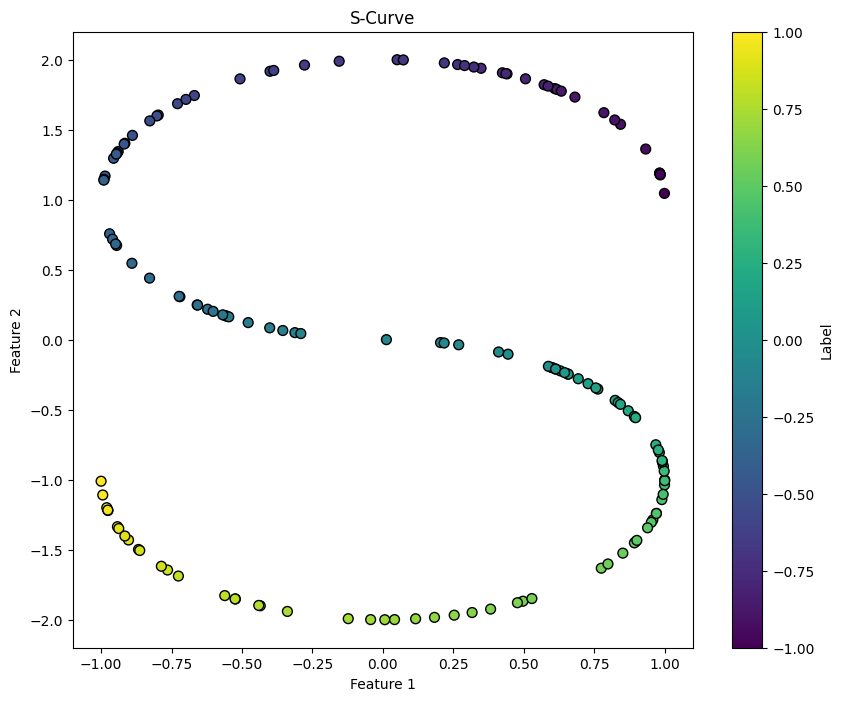

In [27]:
# Generate the data
X_train, theta_train = generate_s_curve_data(random_state=0)
X_test, theta_test = generate_s_curve_data(random_state=1)

# Create the labels
y_train = create_labels_s_curve(X_train, theta_train)
y_test = create_labels_s_curve(X_test, theta_test)

# Plot the data
plot_s_curve(X_train, y_train)

  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([150])) that is different to the input size (torch.Size([150, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 1000/1000 [00:01<00:00, 733.75it/s]


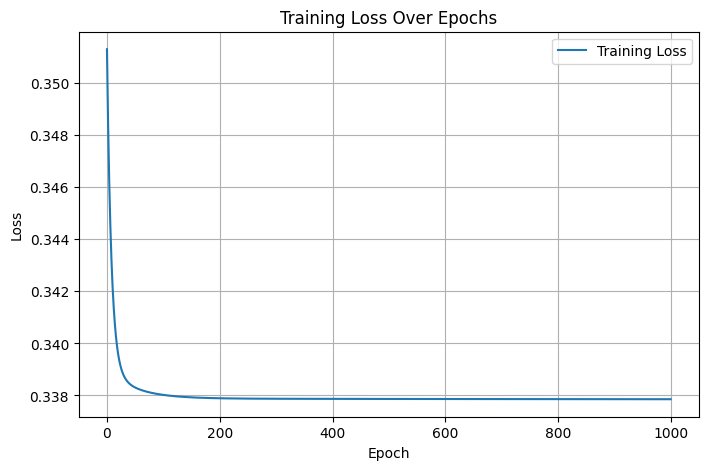

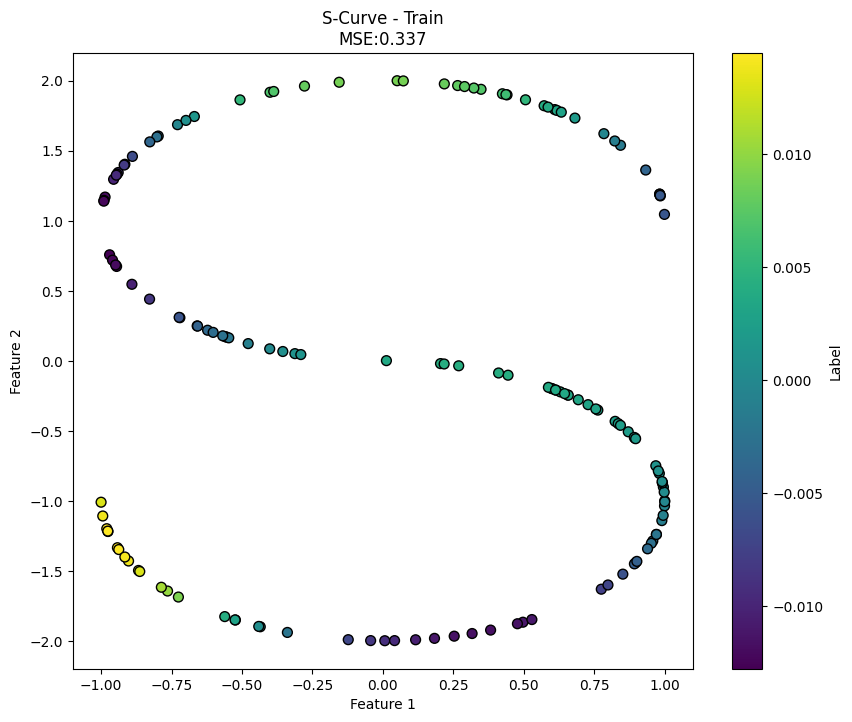

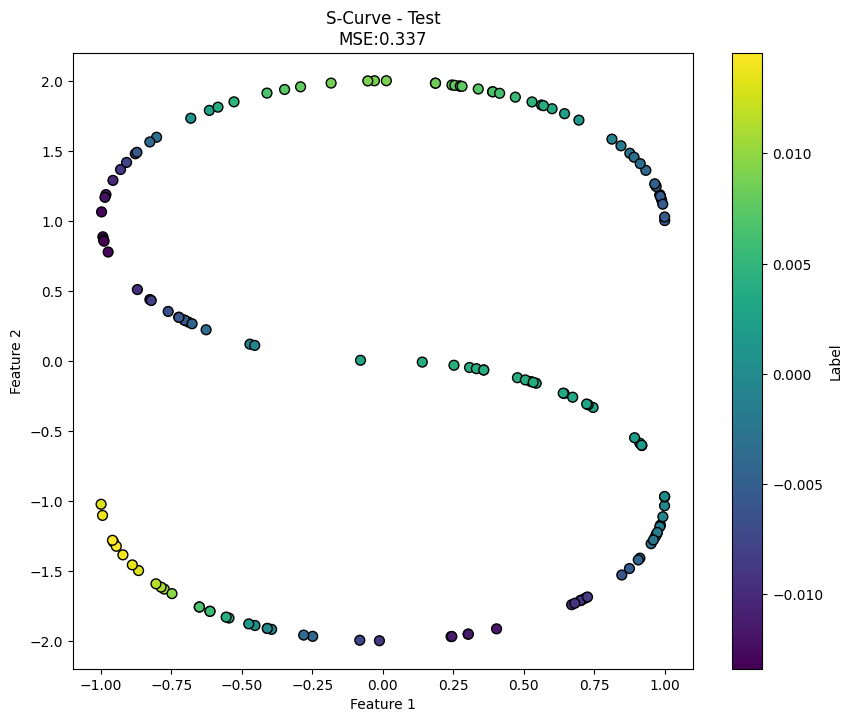

In [28]:
### Your code goes here ####

## Init and train model. Report Accuracy
input_size = 2
output_size = 1
criterion = nn.MSELoss()
hidden_size = [32, 16]
lr = 0.01

X_train, y_train, X_test, y_test = preprocess_data2(X_train, y_train, X_test, y_test)

mlp_model = nn.Sequential(nn.Linear(input_size, hidden_size[0]),
                      nn.Tanh(),
                      nn.Linear(hidden_size[0], hidden_size[1]),
                      nn.Tanh(),
                      nn.Linear(hidden_size[1], output_size))
mlp_model = mlp_model.to(device)

mlp_optimizer = optim.SGD(mlp_model.parameters(), lr, weight_decay=0.001)

mlp_model, training_loss = train_model(mlp_model, X_train, y_train, mlp_optimizer, criterion)
plot_training_loss(training_loss)

accuracy_train, accuracy_test, y_train_pred, y_test_pred = evaluate_model2(mlp_model, X_train, y_train, X_test, y_test)

X_train = X_train.cpu().numpy()
X_test = X_test.cpu().numpy()

plot_s_curve(X_train, y_train_pred, "S-Curve - Train" + "\n" + "MSE:" + str(accuracy_train))
plot_s_curve(X_test, y_test_pred, "S-Curve - Test" + "\n" + "MSE:" + str(accuracy_train))



**Why did the model perform well/poorly?**

The model performed poorly, achieving an MSE of ~0.338, likely due to the limited dataset size and inherent noise in the S-curve data. Additionally, the model's architecture may not have been complex enough to capture the nonlinear patterns effectively.

**What affected your design choices?**

The use of Tanh activation was chosen because its curvy nature aligns with the continuous and nonlinear nature of the S-curve. A simple two-layer MLP was selected to balance computational efficiency and the small dataset size, avoiding potential overfitting.

## EX7

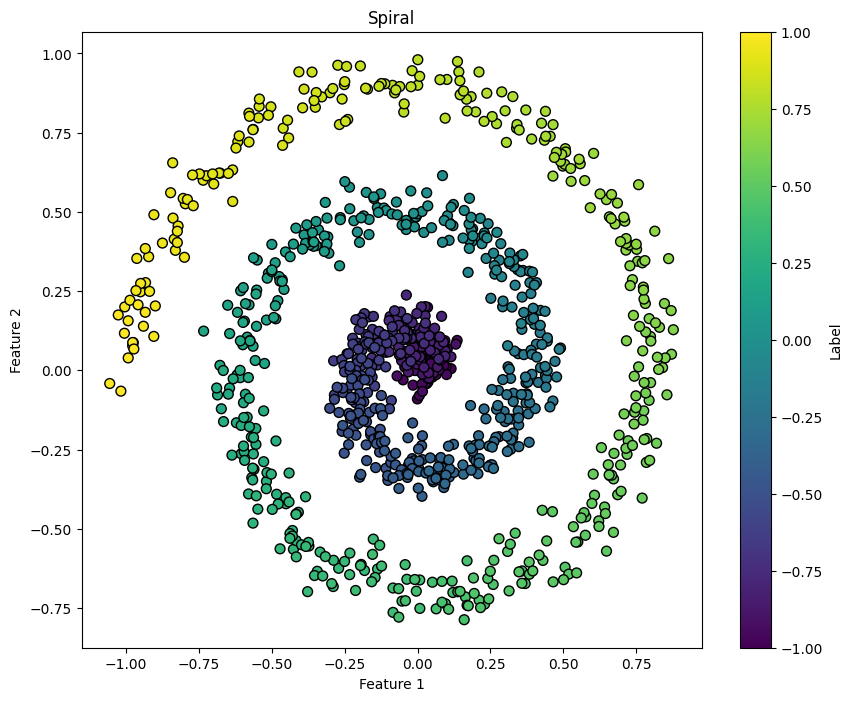

In [29]:
# Generate the data
X_train, theta_train = generate_spiral_data(random_state=0)
X_test, theta_test = generate_spiral_data(random_state=1)
# Create the labels
y_train = create_labels_spiral(theta_train)
y_test = create_labels_spiral(theta_test)
# Plot the data
plot_spiral(X_train, y_train)


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 1000/1000 [00:01<00:00, 789.05it/s]


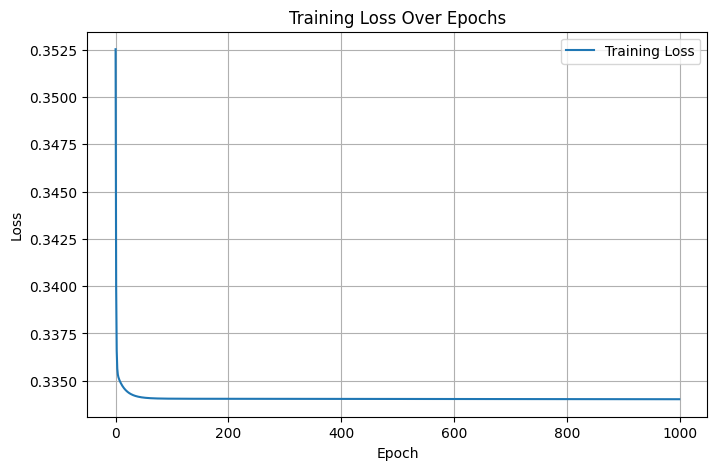

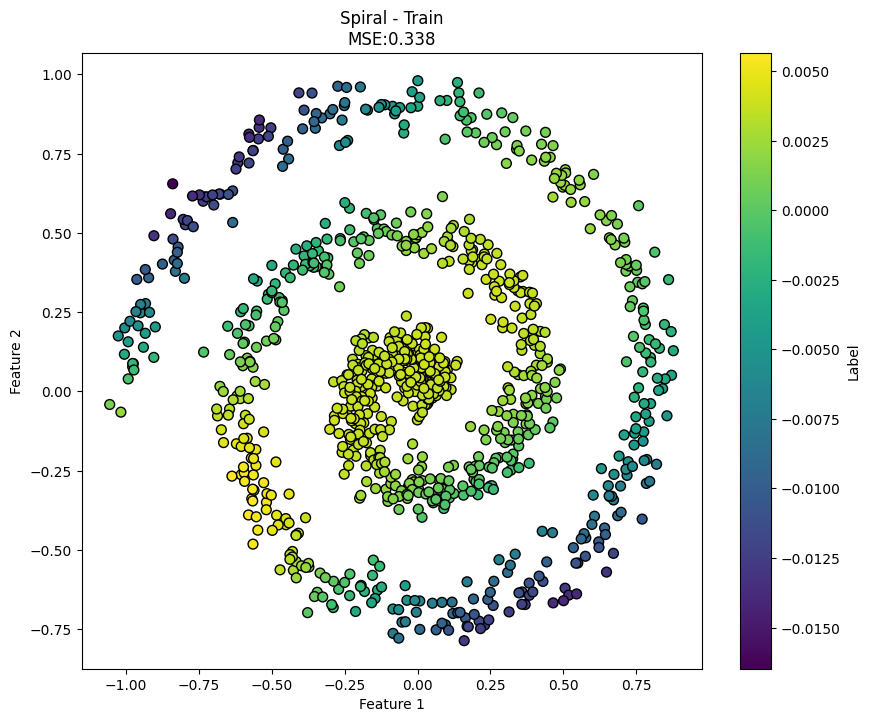

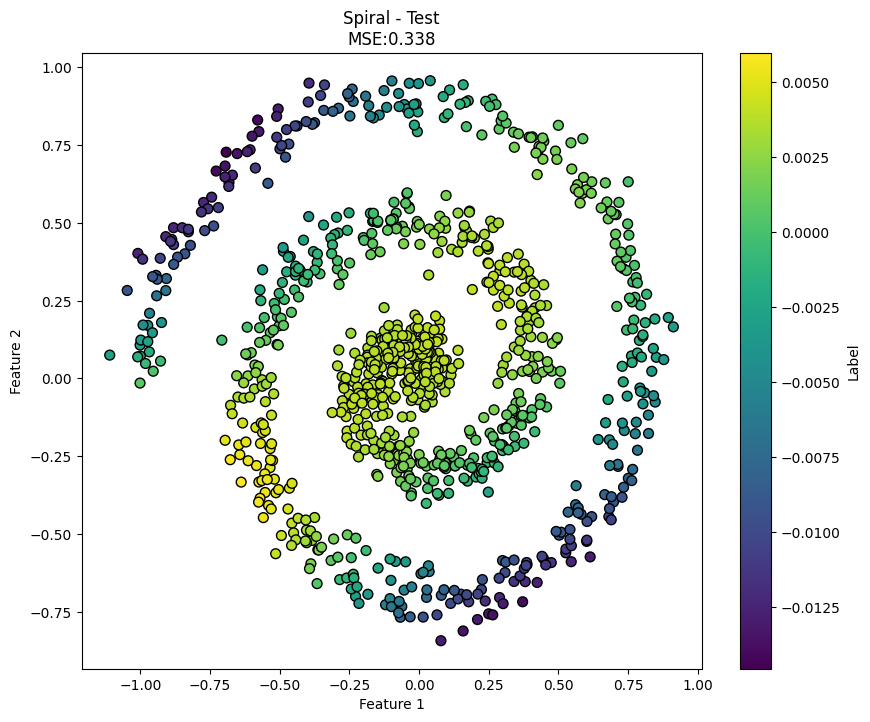

In [30]:
### Your code goes here ####

input_size = 2
output_size = 1
criterion = nn.MSELoss()
hidden_size = [32, 16]
lr = 0.1


X_train, y_train, X_test, y_test = preprocess_data2(X_train, y_train, X_test, y_test)

mlp_model = nn.Sequential(nn.Linear(input_size, hidden_size[0]),
                      nn.Tanh(),
                      nn.Linear(hidden_size[0], hidden_size[1]),
                      nn.Tanh(),
                      nn.Linear(hidden_size[1], output_size))
mlp_model = mlp_model.to(device)

mlp_optimizer = optim.SGD(mlp_model.parameters(), lr, weight_decay=0.0001)

mlp_model, training_loss = train_model(mlp_model, X_train, y_train, mlp_optimizer, criterion)
plot_training_loss(training_loss)

accuracy_train, accuracy_test, y_train_pred, y_test_pred = evaluate_model2(mlp_model, X_train, y_train, X_test, y_test)

X_train = X_train.cpu().numpy()
X_test = X_test.cpu().numpy()


plot_spiral(X_train, y_train_pred, "Spiral - Train" + "\n" + "MSE:" + str(accuracy_train))
plot_spiral(X_test, y_test_pred, "Spiral - Test" + "\n" + "MSE:" + str(accuracy_train))



**Why did the model perform well/poorly?**

The model performed poorly, achieving an MSE of ~0.325, likely due to the limited dataset size and inherent noise in the sprial data. This maybe a slightly better result than the S-Curve is due to the structure of the data.

**What affected your design choices?**

The use of Tanh activation was chosen because its curvy nature aligns with the continuous and nonlinear nature of the spiral. A simple two-layer MLP was selected to balance computational efficiency and the small dataset size, avoiding potential overfitting.


EX8


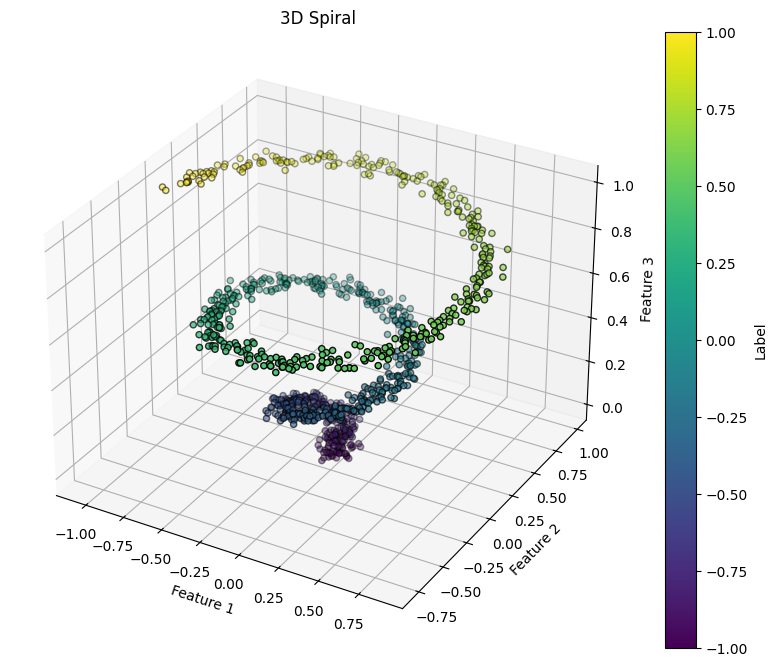

In [31]:
# Generate the data
X_train, theta_train = generate_spiral_data_3d(random_state=0)
X_test, theta_test = generate_spiral_data_3d(random_state=1)

# Create the labels
y_train = create_labels_3d_spiral(theta_train)
y_test = create_labels_3d_spiral(theta_test)

# Plot the data
plot_spiral_3d(X_train, y_train)

100%|██████████| 1000/1000 [00:02<00:00, 419.97it/s]


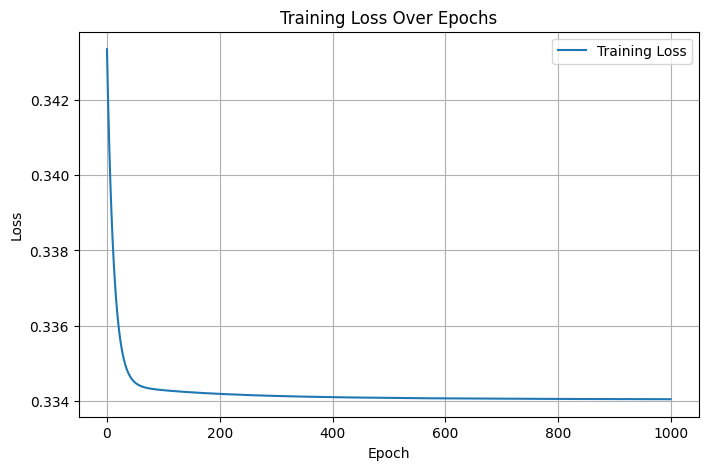

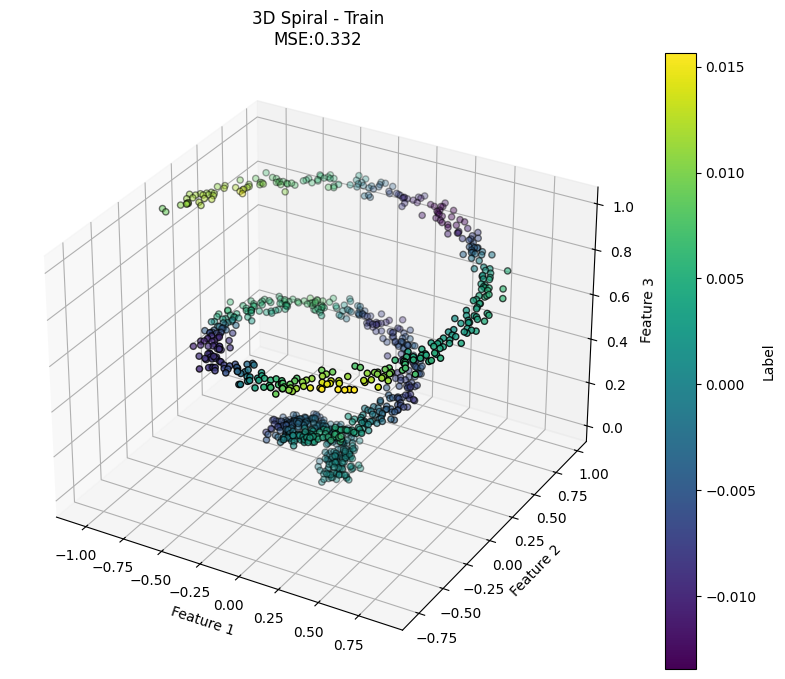

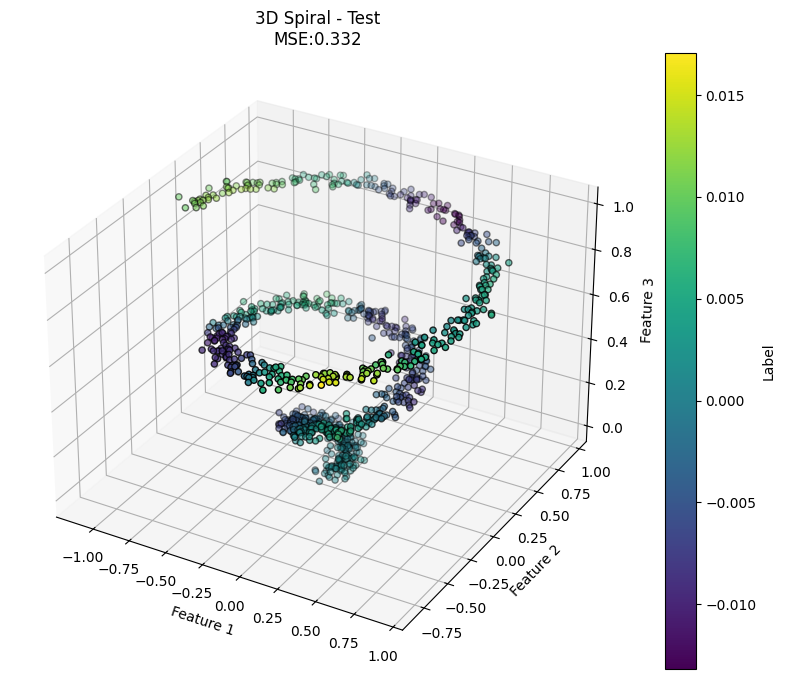

In [32]:

input_size = 3
output_size = 1
criterion = nn.MSELoss()
hidden_size = [64, 32, 16]
lr = 0.01

X_train, y_train, X_test, y_test = preprocess_data2(X_train, y_train, X_test, y_test)

mlp_model = nn.Sequential(nn.Linear(input_size, hidden_size[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_size[0], hidden_size[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_size[1], output_size))
mlp_model = mlp_model.to(device)

mlp_optimizer = optim.SGD(mlp_model.parameters(), lr, weight_decay=0.0001)

mlp_model, training_loss = train_model(mlp_model, X_train, y_train, mlp_optimizer, criterion)
plot_training_loss(training_loss)

accuracy_train, accuracy_test, y_train_pred, y_test_pred = evaluate_model2(mlp_model, X_train, y_train, X_test, y_test)

X_train = X_train.cpu().numpy()
X_test = X_test.cpu().numpy()

plot_spiral_3d(X_train, y_train_pred, "3D Spiral - Train" + "\n" + "MSE:" + str(accuracy_train))
plot_spiral_3d(X_test, y_test_pred, "3D Spiral - Test" + "\n" + "MSE:" + str(accuracy_train))

**Why did the model perform well/poorly?**

The model performed poorly, achieving an MSE of ~0.336, likely due to the limited dataset size and inherent noise in the sprial data.

**What affected your design choices?**

The use of ReLU activation was chosen because its a reliable activation function. A simple two-layer MLP was selected to balance computational efficiency and the small dataset size, avoiding potential overfitting.

# MNIST Binary Classification Task (20 pts.)
## EX9
Perform a binray classification task on the MNIST dataset between two digits (you may choose any two digits).
### You are required to do the following:
1. Create a subset of the train/test sets for the two digits you have chosen
2. Create a validation set out of the train set (80%-20% split)
3. Normalize the data
4. Write a training function
5. Write an evaluation function that returns the accuracy
6. Plot the training and validation accuracy for each epoch
7. Plot 10 test images of each class with their predicited labels
8. Print the test set accuracy

### Hyperparameters:
Briefly explain why you have chosen each parameter:
1. Model: MLP, CNN (both are valid options)
2. Number of layers, number of neurons/kernels, kernel size
3. Number of epochs (between 10-100)
4. Learning rate
5. Loss function
6. Activation function

**Grading**: Correctness and discussion. You are not grade on accuracy in this section.

### Discuss the results (3-5 lines)
Did the model converge? did it overfit? How is classifying images different from the toy examples we saw? Write you overall first impressions after solving this HW.

Training Epochs:   0%|          | 0/25 [00:00<?, ?it/s]

Epoch 1/25, Train Loss: 0.6827, Val Loss: 0.6662, Train Acc: 0.5136, Val Acc: 0.5985
Epoch 2/25, Train Loss: 0.6470, Val Loss: 0.6261, Train Acc: 0.8293, Val Acc: 0.9375
Epoch 3/25, Train Loss: 0.6016, Val Loss: 0.5702, Train Acc: 0.9523, Val Acc: 0.9680
Epoch 4/25, Train Loss: 0.5348, Val Loss: 0.4877, Train Acc: 0.9644, Val Acc: 0.9730
Epoch 5/25, Train Loss: 0.4424, Val Loss: 0.3832, Train Acc: 0.9621, Val Acc: 0.9720
Epoch 6/25, Train Loss: 0.3409, Val Loss: 0.2834, Train Acc: 0.9639, Val Acc: 0.9745
Epoch 7/25, Train Loss: 0.2520, Val Loss: 0.2068, Train Acc: 0.9666, Val Acc: 0.9765
Epoch 8/25, Train Loss: 0.1891, Val Loss: 0.1575, Train Acc: 0.9694, Val Acc: 0.9775
Epoch 9/25, Train Loss: 0.1502, Val Loss: 0.1276, Train Acc: 0.9706, Val Acc: 0.9785
Epoch 10/25, Train Loss: 0.1259, Val Loss: 0.1087, Train Acc: 0.9705, Val Acc: 0.9785
Epoch 11/25, Train Loss: 0.1096, Val Loss: 0.0959, Train Acc: 0.9731, Val Acc: 0.9785
Epoch 12/25, Train Loss: 0.0995, Val Loss: 0.0872, Train Acc: 0

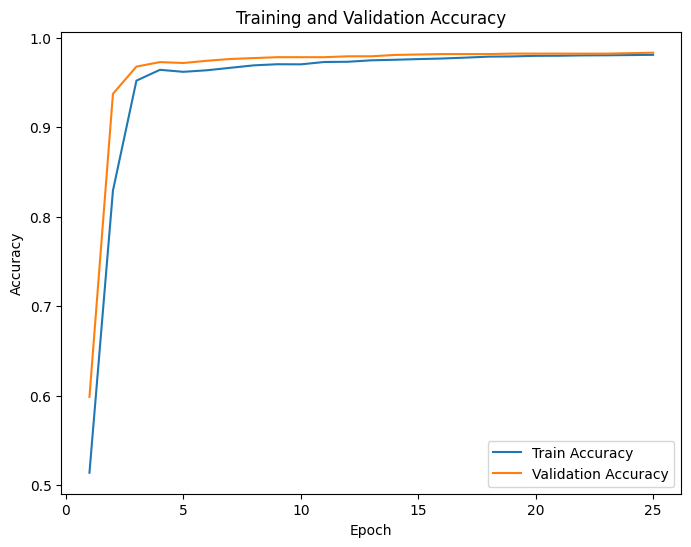

Accuracy: 98.29 %


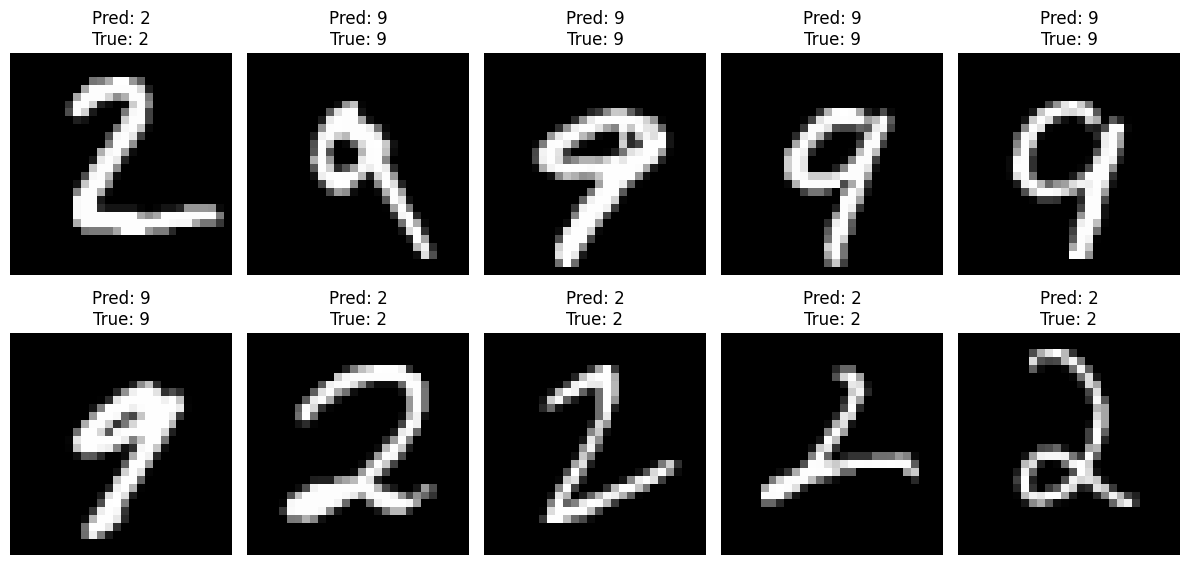

In [34]:
from torch.utils.data import Subset, DataLoader, random_split
from tqdm.auto import tqdm
import torch
import torchvision.transforms as transforms
import torchvision
import numpy as np

# Define digits for binary classification
digits = [2, 9]

# Torch/PIL transformations applied to the images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

batch_size = 512

# Load MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Filter indices for the specified digits
train_indices = [i for i, label in enumerate(trainset.targets) if label in digits]
test_indices = [i for i, label in enumerate(testset.targets) if label in digits]

# Random subset of 10k training examples
N = 10000
torch.manual_seed(0)
np.random.seed(0)

train_subset_idx = np.random.choice(train_indices, N, replace=False)
train_subset = Subset(trainset, train_subset_idx)

# Split train_subset into training and validation datasets
val_size = int(0.2 * N)  # 20% for validation
train_size = N - val_size

train_dataset, val_dataset = random_split(
    train_subset, [train_size, val_size], generator=torch.Generator().manual_seed(0)
)

# DataLoaders for training, validation, and test
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
testloader = DataLoader(Subset(testset, test_indices), batch_size=batch_size, shuffle=False, num_workers=2)


# Train function

def train_model(model, trainloader, valloader, optimizer, criterion, num_epochs=10):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in tqdm(range(num_epochs), desc="Training Epochs"):
        # Training Phase
        model.train()
        train_correct, train_total = 0, 0
        running_loss = 0.0

        for inputs, labels in trainloader:
            inputs = inputs.view(inputs.size(0), -1).to(device)
            labels = (labels == digits[1]).long().to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            train_correct += (preds == labels).sum().item()
            train_total += labels.size(0)

        train_losses.append(running_loss / len(trainloader))
        train_accuracies.append(train_correct / train_total)

        # Validation Phase
        model.eval()
        val_correct, val_total = 0, 0
        val_loss = 0.0

        with torch.no_grad():
            for inputs, labels in valloader:
                inputs = inputs.view(inputs.size(0), -1).to(device)
                labels = (labels == digits[1]).long().to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()
                val_total += labels.size(0)

        val_losses.append(val_loss / len(valloader))
        val_accuracies.append(val_correct / val_total)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, "
              f"Val Loss: {val_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, "
              f"Val Acc: {val_accuracies[-1]:.4f}")

    return model, train_losses, val_losses, train_accuracies, val_accuracies

# evalute model
def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in dataloader:
            data = data.view(data.size(0), -1).to(device)
            target = (target == digits[1]).long().to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy:.2f} %')
    return accuracy


# Plot training and validation accuracy
def plot_accuracies(train_accuracies, val_accuracies, num_epochs):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, num_epochs + 1), train_accuracies, label="Train Accuracy")
    plt.plot(range(1, num_epochs + 1), val_accuracies, label="Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.legend()
    plt.show()

# Plot test images with predicted labels
def plot_test_predictions(model, testloader, num_images=10):
    model.eval()
    images, labels = next(iter(testloader))
    inputs = images.view(images.size(0), -1).to(device)
    original_labels = labels.numpy()
    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

    preds = preds.cpu().numpy()

    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    axes = axes.ravel()
    count = 0
    for i in range(len(original_labels)):
        if count >= num_images:
            break
        if original_labels[i] in digits:
            axes[count].imshow(images[i].squeeze(), cmap="gray")
            axes[count].set_title(f"Pred: {digits[preds[i]]}\nTrue: {original_labels[i]}")
            axes[count].axis("off")
            count += 1
    plt.tight_layout()
    plt.show()


# Define model, optimizer, and criterion
input_size = 784
hidden_sizes = [128, 64]
output_size = 2
lr = 0.01

# Define the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
model = model.to(device)

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), momentum=0.9)


# Train the model
num_epochs = 25
model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, trainloader, valloader, optimizer, criterion, num_epochs
)

# Plot accuracies
plot_accuracies(train_accuracies, val_accuracies, num_epochs)

# Evaluate and print test set accuracy
test_accuracy = evaluate_model(model, testloader)

# Plot test images with predicted labels
plot_test_predictions(model, testloader, num_images=10)





**Hyperparameters:**

**Model: MLP, CNN (both are valid options)**

While CNNs are generally better suited for image recognition tasks due to their ability to capture spatial hierarchies in data, we chose to use an MLP because the task involves grayscale images and binary classification, which is computationally less demanding. The simplicity and efficiency of the MLP make it a suitable choice for this specific task, and it provided satisfactory results.

**Number of layers, number of neurons:**

We obtained the best results using a two-layer architecture with 128 and 64 neurons in the hidden layers, respectively. A smaller architecture (e.g., 32 and 16 neurons) also performed well. However, adding a third layer or increasing the hidden size tended to degrade performance, likely due to overfitting on the relatively simple binary classification task.


**Number of epochs (between 10-100):**

The model converged quickly, achieving over 98% accuracy within 20-25 epochs. While training for 100 epochs slightly improved accuracy (up to 98.63%), the additional time and computation may not be necessary in most cases.


**Learning rate:**

A learning rate of 0.01 struck a good balance between optimization speed and stability, preventing overshooting of the loss minimum.


**Loss function:**

Negative Log Likelihood Loss was chosen as it is well-suited for binary classification tasks when paired with softmax outputs.

**Activation function:**

ReLU was selected due to its efficiency and reliability. It avoids the vanishing gradient problem that can occur with other activation functions like sigmoid or tanh.


**Discussion:**

**Did the model converge? did it overfit? How is classifying images different from the toy examples we saw? Write you overall first impressions after solving this HW.**


The model did converge, in all aspects (validation acc, training acc, and test acc). Thus, it clearly did not overfit.
This was diffrent than the toy examples since we had to handle much more data. We needed to use dataloaders and a use a validation set to make sure that we were not overfitting the data. In addition, the input size was much larger.
Our overall impression is that the model can converge rather quickly with relatively low hidden sizes and that 2 layers worked best in most cases.


